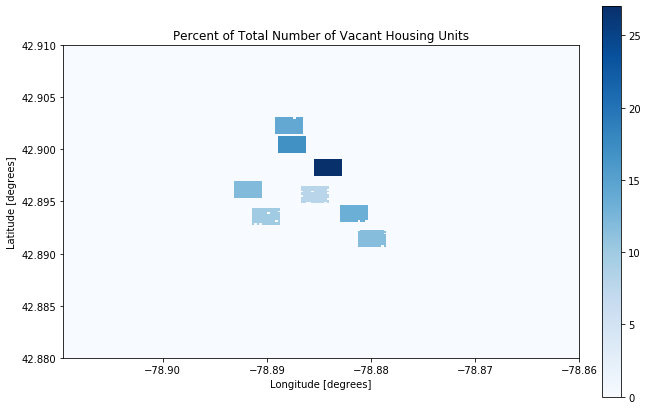

In [101]:
'''
  Note: The way a map is formed onto a graph is by taking the data points, which contains its coordinates, and plotting it onto the graph based 
  on longitude and latitude. Thus,this requires a lot data to get the outline of how the physical location looks like. Since Lower West Side has
  only 8 data points, and the other areas having similar quantity, we are not able to produce a graph that looks like a map with this method.
  
  However, we are trying to use the data produced in this file by merging it with the shapefile.
  
  Resource used: https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data
'''
#Code taken from 
import random as ran
def convert_to_2d(lats,lons,values):
    latmin = 42.88
    lonmin = -78.9095821
    latmax = 42.91
    lonmax = -78.86
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat)) 
        lon_idx = int(np.rint((lon-lonmin) / dlon ))   
      
        if not np.isnan(value):
  # VOLTAIRE ADDITION -- inside the ran.uniform should be the edges of the shape file to complete the whole block image
            for x in range(int(value) * 50): # this is to make the data visible
                ran_lon_idx, ran_lat_idx = int(np.rint(ran.uniform(-5,5)) + lon_idx), int(np.rint(ran.uniform(-5,5)) + lat_idx)  
                if ran_lat_idx < 200 and ran_lon_idx < 200: 
                    map_values[ran_lon_idx,ran_lat_idx] = value
            # -- 
    return lat_vals,lon_vals,map_values

def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.INTPTLAT10,blocks.INTPTLON10,data_values)
   
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
   
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)

    plt.colorbar(im,fraction=0.035, pad=0.04)
    plt.show()
    
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

blocks = pd.read_csv('Block_Groups_data.csv') #https://data.buffalony.gov/Government/Block-Groups/i76q-u5zs
census = pd.read_csv('LowerWestSide_Data.csv',index_col=0) #Get this file from LowerWestSide_py

blocks = pd.merge(blocks,census,on=['Tract','Block Group'])

#blocks['Percent of Total Number of Vacant Housing Units'] = blocks['Percent of Total Number of Vacant Housing Units'] * 10 
make_plot(blocks['Percent of Total Number of Vacant Housing Units'],colors='Blues',title='Percent of Total Number of Vacant Housing Units')